In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'S:\\lab_winter\\martin\\MJ-19-1\\plots\\' # directory for output plots

In [2]:
#########################################
#### convert gene name to ENSEMBL ID ####
#########################################

dic = pd.read_csv('W:\lab_winter\private\Experiments\Matthias_MB\\2018\MB18_56 QuantSeq merge analysis\\data\\ENStoGeneName.txt', sep="\t")
dic.columns = ['geneID', 'gene_name']
dic = dic.set_index('gene_name')

geneset_df = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\20190716_finalizing_SE_CRC_genesets_NM_only_TTseq.xlsx')

In [3]:
### 464 SEs
SE_genes = geneset_df['SEs_464'].dropna().tolist()

#check if same number of IDs as gene gene names
if len(set(SE_genes)) != len(dic.loc[SE_genes].index.tolist()):
    print "genesets don't match! Following genes are duplicates:"
    for x in dic.loc[SE_genes].index.tolist():
        if dic.loc[SE_genes].index.tolist().count(x) > 1:
            print x

#dic.loc[SE_genes].to_excel('S:\lab_winter\martin\Mediator_CRC\\SE_464_genes.xlsx')

C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the docum

genesets don't match! Following genes are duplicates:
ABCC1
ABCC1
ACTN4
ACTN4
B3GNTL1
B3GNTL1
CABIN1
CABIN1
CEACAM21
CEACAM21
HLA-E
HLA-E
HLA-E
HLA-E
HLA-E
HLA-E
HLA-E
INPP5D
INPP5D
KLF13
KLF13
LAIR1
LAIR1
LAIR1
LAIR1
LAIR1
LRP6
LRP6
LST1
LST1
LST1
LST1
LST1
LST1
LST1
LST1
LY6E
LY6E
MATR3
MATR3
NKD2
NKD2
PHACTR1
PHACTR1
PTPRC
PTPRC
PYCR3
PYCR3
SDCCAG8
SDCCAG8


In [4]:
### 53 SE TFs
TF_genes = geneset_df['TFs_53'].dropna().tolist()

#check if same number of IDs as gene gene names
if len(set(TF_genes)) != len(dic.loc[TF_genes].index.tolist()):
    print "genesets don't match! Following genes are duplicates:"
    for x in dic.loc[TF_genes].index.tolist():
        if dic.loc[TF_genes].index.tolist().count(x) > 1:
            print x

#dic.loc[TF_genes].to_excel('S:\lab_winter\martin\Mediator_CRC\\TF_53_genes.xlsx')

genesets don't match! Following genes are duplicates:
KLF13
KLF13


In [5]:
### 24 autoregulatory 6/6 TFs
autoreg_genes = geneset_df['autoregulatory_6motifs_24'].dropna().tolist()

#check if same number of IDs as gene gene names
if len(set(autoreg_genes)) != len(dic.loc[autoreg_genes].index.tolist()):
    print "genesets don't match! Following genes are duplicates:"
    for x in dic.loc[autoreg_genes].index.tolist():
        if dic.loc[autoreg_genes].index.tolist().count(x) > 1:
            print x

#dic.loc[autoreg_genes].to_excel('S:\lab_winter\martin\Mediator_CRC\\autoregulatory_6motifs_24_genes.xlsx')

genesets don't match! Following genes are duplicates:
KLF13
KLF13


In [6]:
### 29 extended CRC (incl. MYB)
CRC_29_genes = geneset_df['CRC_MYB_29'].dropna().tolist()

#check if same number of IDs as gene gene names
if len(set(CRC_29_genes)) != len(dic.loc[CRC_29_genes].index.tolist()):
    print "genesets don't match! Following genes are duplicates:"
    for x in dic.loc[CRC_29_genes].index.tolist():
        if dic.loc[CRC_29_genes].index.tolist().count(x) > 1:
            print x

#dic.loc[CRC_29_genes].to_excel('S:\lab_winter\martin\Mediator_CRC\\CRC_incl_MYB_29_genes.xlsx')

genesets don't match! Following genes are duplicates:
KLF13
KLF13


In [7]:
### 22 old CRC (based on PROseq)
CRC_old_22_genes = geneset_df['old_CRC_22'].dropna().tolist()

#check if same number of IDs as gene gene names
if len(set(CRC_old_22_genes)) != len(dic.loc[CRC_old_22_genes].index.tolist()):
    print "genesets don't match! Following genes are duplicates:"
    for x in dic.loc[CRC_old_22_genes].index.tolist():
        if dic.loc[CRC_old_22_genes].index.tolist().count(x) > 1:
            print x

#dic.loc[CRC_old_22_genes].to_excel('S:\lab_winter\martin\Mediator_CRC\\CRC_old_22_genes.xlsx')

In [3]:
####################################
#### load in all the gene lists ####
####################################

SE_464_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\SE_464_genes.xlsx')
TF_53_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\TF_53_genes.xlsx')
autoreg_24_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\autoregulatory_6motifs_24_genes.xlsx')
CRC_29_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\CRC_incl_MYB_29_genes.xlsx')
CRC_old_22_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\CRC_old_22_genes.xlsx')


In [4]:
######################################
##### load pause-initiation data #####
######################################
# pause-initiation dataframe
PI_df = pd.read_csv('S:\\lab_winter\\martin\\MED14_PRO-seq_final\\other_final_files\\pause-initiation-modeling\\MED14as.estimates.txt', sep="\t")

SE_464_PI = PI_df[PI_df.gene_id.str.contains('|'.join(SE_464_genes.geneID.tolist()), na=False)]
TF_53_PI = PI_df[PI_df.gene_id.str.contains('|'.join(TF_53_genes.geneID.tolist()), na=False)]
autoreg_PI = PI_df[PI_df.gene_id.str.contains('|'.join(autoreg_24_genes.geneID.tolist()), na=False)]
CRC_29_PI = PI_df[PI_df.gene_id.str.contains('|'.join(CRC_29_genes.geneID.tolist()), na=False)]
CRC_old_PI = PI_df[PI_df.gene_id.str.contains('|'.join(CRC_old_22_genes.geneID.tolist()), na=False)]


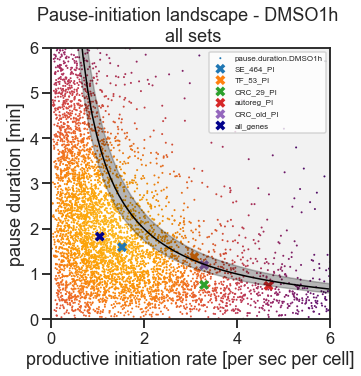

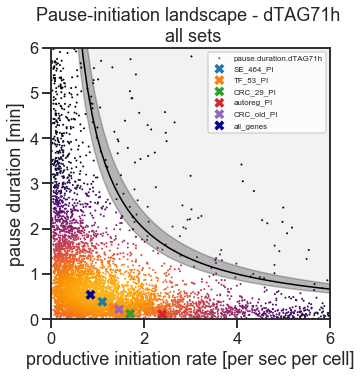

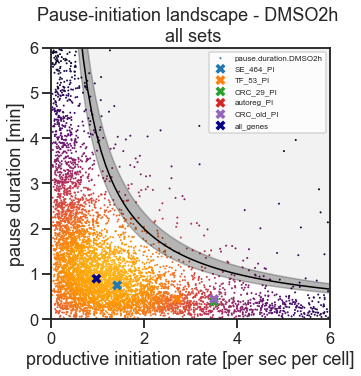

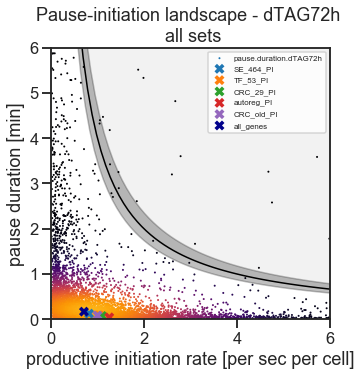

In [6]:
###########################################
##### plot pause-initiation landscape #####
###########################################

all_sets = [SE_464_PI, TF_53_PI, CRC_29_PI, autoreg_PI, CRC_old_PI]
all_set_names = ["SE_464_PI", "TF_53_PI", "CRC_29_PI", "autoreg_PI", "CRC_old_PI"]

clean_PI_df = PI_df.dropna()
clean_PI_df = clean_PI_df[~clean_PI_df.isin([np.inf]).any(1)]

# make the plot
for condition in ["DMSO1h", "dTAG71h", "DMSO2h", "dTAG72h"]:
    
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(5,5))

    # for plotting kernel density colormap
    xy = np.vstack([clean_PI_df['initiation.rate.per.cell.{0}'.format(condition)],clean_PI_df['pause.duration.{0}'.format(condition)]])
    z = sc.stats.gaussian_kde(xy)(xy)

    # plotting all individual
    plt.scatter(x=clean_PI_df['initiation.rate.per.cell.{0}'.format(condition)], y=clean_PI_df['pause.duration.{0}'.format(condition)], s=4, cmap="inferno", c=z, vmin=100*z.min(), vmax=1.2*z.max(), edgecolors="none")

    counter = 0
    for geneset in all_sets:
        plt.scatter(x=geneset['initiation.rate.per.cell.{0}'.format(condition)].median(), y=geneset['pause.duration.{0}'.format(condition)].median(), marker="X", s=100, label=all_set_names[counter], edgecolors="none")
        counter += 1

    plt.scatter(x=clean_PI_df['initiation.rate.per.cell.{0}'.format(condition)].median(), y=clean_PI_df['pause.duration.{0}'.format(condition)].median(), marker="X", s=100, c="darkblue", label="all_genes", edgecolors="none")

    #### make central pause-initiation limit
    x = np.linspace(200./(10*50), 10, num=100)
    y = (200./50)/np.linspace(200./(10*50), 10, num=100)
    x = np.append(x, 10)
    y = np.append(y, 10)

    plt.fill(x,y, edgecolor="#000000", facecolor="#0000000D")

    # make confidence intervals
    uncertainty = 0.15
    x1 = np.linspace(200./((10*50)*(1 + uncertainty)), 10, num=100)
    x2 = np.linspace(200./((10*50)*(1 - uncertainty)), 10, num=100)[::-1]
    y1 = (200./(50*(1 + uncertainty)))/np.linspace(200./(10*50*(1 + uncertainty)), 10, num=100)
    y2 = (200./(50*(1 - uncertainty)))/np.linspace(200./(10*50*(1 - uncertainty)), 10, num=100)[::-1]

    plt.fill(np.append(x1, x2),np.append(y1, y2), alpha=.25, color="#000000")

    
    # formatting
    plt.title('Pause-initiation landscape - {0} \n all sets'.format(condition))
    plt.legend(loc="upper right", fontsize=8)
    plt.xlim(0, 6)
    plt.ylim(0, 6)
    plt.xlabel('productive initiation rate [per sec per cell]')
    plt.ylabel('pause duration [min]')

    # save
    #plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_{0}_scatter_all-genesets_10x10.pdf'.format(condition), dpi=300)
    #plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_{0}_scatter_all-genesets_10x10.png'.format(condition), dpi=300)
    plt.show()

<Figure size 360x360 with 0 Axes>

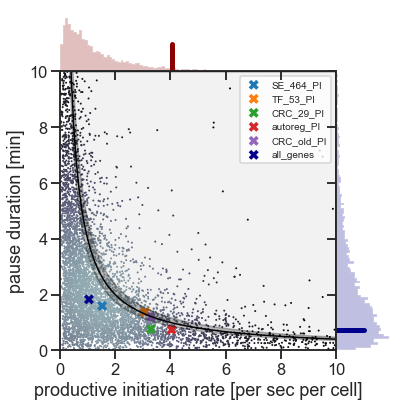

<Figure size 360x360 with 0 Axes>

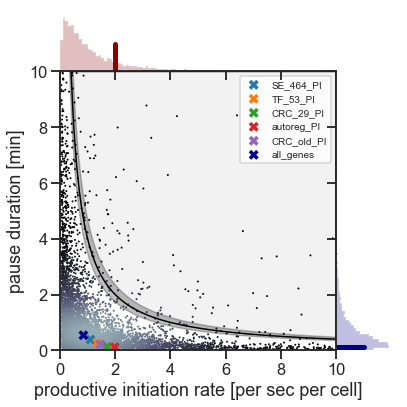

<Figure size 360x360 with 0 Axes>

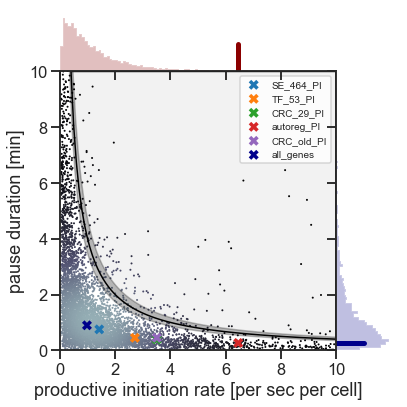

<Figure size 360x360 with 0 Axes>

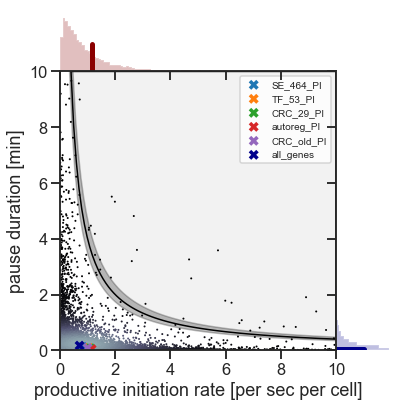

In [8]:
###########################################
##### plot pause-initiation landscape #####
###########################################

all_sets = [SE_464_PI, TF_53_PI, CRC_29_PI, autoreg_PI, CRC_old_PI]
all_set_names = ["SE_464_PI", "TF_53_PI", "CRC_29_PI", "autoreg_PI", "CRC_old_PI"]

for condition in ["DMSO1h", "dTAG71h", "DMSO2h", "dTAG72h"]:

    ### make jointGrid plot
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(5,5))

    # for plotting kernel density colormap
    xy = np.vstack([clean_PI_df['initiation.rate.per.cell.{0}'.format(condition)],clean_PI_df['pause.duration.{0}'.format(condition)]])
    z = sc.stats.gaussian_kde(xy)(xy)

    # make jointGrid
    g = sns.JointGrid(x='initiation.rate.per.cell.{0}'.format(condition), y='pause.duration.{0}'.format(condition), data=clean_PI_df, space=0, xlim=(0,10), ylim=(0,10))

    g = g.plot_joint(plt.scatter, s=4, cmap="bone", c=z, vmin=z.min(), vmax=1.5*z.max(), linewidth=0)

    _ = g.ax_marg_x.hist(clean_PI_df['initiation.rate.per.cell.{0}'.format(condition)], color="darkred", alpha=.25, bins=np.arange(0,10,.1), density=True, histtype="stepfilled")
    _ = g.ax_marg_y.hist(clean_PI_df['pause.duration.{0}'.format(condition)], color="darkblue", alpha=.25, bins=np.arange(0,10,.1), density=True, histtype="stepfilled", orientation="horizontal")
    _ = g.ax_marg_x.axvline(x=autoreg_PI['initiation.rate.per.cell.{0}'.format(condition)].median(), ymax=0.5, color="darkred", linewidth=5)
    _ = g.ax_marg_y.axhline(y=autoreg_PI['pause.duration.{0}'.format(condition)].median(), xmax=0.5, color="darkblue", linewidth=5)

    counter = 0
    for geneset in all_sets:
        plt.scatter(x=geneset['initiation.rate.per.cell.{0}'.format(condition)].median(), y=geneset['pause.duration.{0}'.format(condition)].median(), marker="X", s=100, label=all_set_names[counter], edgecolors="none")
        counter += 1

    plt.scatter(x=clean_PI_df['initiation.rate.per.cell.{0}'.format(condition)].median(), y=clean_PI_df['pause.duration.{0}'.format(condition)].median(), marker="X", s=100, c="darkblue", label="all_genes", edgecolors="none")
    
    #### make central pause-initiation limit
    x = np.linspace(200./(10*50), 10, num=100)
    y = (200./50)/np.linspace(200./(10*50), 10, num=100)
    x = np.append(x, 10)
    y = np.append(y, 10)

    plt.fill(x,y, edgecolor="#000000", facecolor="#0000000D")

    # make confidence intervals
    x1 = np.linspace(200./((10*50)*(1 + uncertainty)), 10, num=100)
    x2 = np.linspace(200./((10*50)*(1 - uncertainty)), 10, num=100)[::-1]
    y1 = (200./(50*(1 + uncertainty)))/np.linspace(200./(10*50*(1 + uncertainty)), 10, num=100)
    y2 = (200./(50*(1 - uncertainty)))/np.linspace(200./(10*50*(1 - uncertainty)), 10, num=100)[::-1]

    plt.fill(np.append(x1, x2),np.append(y1, y2), alpha=.25, color="#000000")
   
    
    # formatting
    plt.legend(loc="upper right", fontsize=10)
    plt.xlabel('productive initiation rate [per sec per cell]')
    plt.ylabel('pause duration [min]')

    # save
    #plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_{0}_jointPlot_all-genesets_boneR_10x10.pdf'.format(condition), dpi=300)
    #plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_{0}_jointPlot_all-genesets_boneR_10x10.png'.format(condition), dpi=300)
    plt.show()

<Figure size 360x360 with 0 Axes>

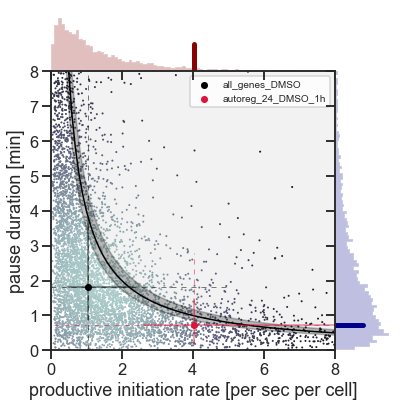

In [9]:
###########################################
##### plot pause-initiation landscape DMSO only #####
###########################################

all_sets = [SE_464_PI, TF_53_PI, CRC_29_PI, autoreg_PI, CRC_old_PI]
all_set_names = ["SE_464_PI", "TF_53_PI", "CRC_29_PI", "autoreg_PI", "CRC_old_PI"]

### make jointGrid plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(5,5))

# for plotting kernel density colormap
xy = np.vstack([clean_PI_df['initiation.rate.per.cell.DMSO1h'],clean_PI_df['pause.duration.DMSO1h']])
z = sc.stats.gaussian_kde(xy)(xy)



# make jointGrid
g = sns.JointGrid(x='initiation.rate.per.cell.DMSO1h', y='pause.duration.DMSO1h', data=clean_PI_df, space=0, xlim=(0,8), ylim=(0,8))

# cmap Bone
#g = g.plot_joint(plt.scatter, s=4, cmap="bone", c=z, vmin=z.min(), vmax=1.5*z.max(), linewidth=0)
# cmap inferno
g = g.plot_joint(plt.scatter, s=4, cmap="bone", c=z, vmin=z.min(), vmax=1.3*z.max(), linewidth=0)

_ = g.ax_marg_x.hist(clean_PI_df['initiation.rate.per.cell.DMSO1h'], color="darkred", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled")
_ = g.ax_marg_y.hist(clean_PI_df['pause.duration.DMSO1h'], color="darkblue", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled", orientation="horizontal")

#_ = g.ax_marg_x.axvline(x=clean_PI_df['initiation.rate.per.cell.DMSO1h'].median(), ymax=0.5, color="black", linewidth=5)
#_ = g.ax_marg_y.axhline(y=clean_PI_df['pause.duration.DMSO1h'].median(), xmax=0.5, color="black", linewidth=5)

_ = g.ax_marg_x.axvline(x=autoreg_PI['initiation.rate.per.cell.DMSO1h'].median(), ymax=0.5, color="darkred", linewidth=5)
_ = g.ax_marg_y.axhline(y=autoreg_PI['pause.duration.DMSO1h'].median(), xmax=0.5, color="darkblue", linewidth=5)


#### make central pause-initiation limit
x = np.linspace(200./(10*50), 10, num=100)
y = (200./50)/np.linspace(200./(10*50), 10, num=100)
x = np.append(x, 10)
y = np.append(y, 10)

plt.fill(x,y, edgecolor="#000000", facecolor="#0000000D")

# make confidence intervals
x1 = np.linspace(200./((10*50)*(1 + uncertainty)), 10, num=100)
x2 = np.linspace(200./((10*50)*(1 - uncertainty)), 10, num=100)[::-1]
y1 = (200./(50*(1 + uncertainty)))/np.linspace(200./(10*50*(1 + uncertainty)), 10, num=100)
y2 = (200./(50*(1 - uncertainty)))/np.linspace(200./(10*50*(1 - uncertainty)), 10, num=100)[::-1]

plt.fill(np.append(x1, x2),np.append(y1, y2), alpha=.25, color="#000000")


#### plot X median markers (DMSO and 1h)
plt.scatter(x=clean_PI_df['initiation.rate.per.cell.DMSO1h'].median(), y=clean_PI_df['pause.duration.DMSO1h'].median(), marker="o", s=50, c="black", label="all_genes_DMSO", linewidths=0)
plt.plot([clean_PI_df['initiation.rate.per.cell.DMSO1h'].median()], [clean_PI_df['pause.duration.DMSO1h'].median()], color="black", linewidth=2)

plt.scatter(x=autoreg_PI['initiation.rate.per.cell.DMSO1h'].median(), y=autoreg_PI['pause.duration.DMSO1h'].median(), marker="o", s=50, c="crimson", label="autoreg_24_DMSO_1h", linewidths=0)
plt.plot([autoreg_PI['initiation.rate.per.cell.DMSO1h'].median()], [autoreg_PI['pause.duration.DMSO1h'].median()], color="crimson", linewidth=2)



#### plot dashed lines as whiskers (1.5*(0.75p - 0.25p quartile range))
## autoregulatory TFs
# initiation freq.
IQR_autoreg_init=autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75) - autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25)
low_autoreg_whis_init = max([autoreg_PI['initiation.rate.per.cell.DMSO1h'].min(), autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25) - 1.5*IQR_autoreg_init])
hi_autoreg_whis_init = min([autoreg_PI['initiation.rate.per.cell.DMSO1h'].max(), autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75) + 1.5*IQR_autoreg_init])
plt.plot([low_autoreg_whis_init, hi_autoreg_whis_init], [autoreg_PI['pause.duration.DMSO1h'].median(),autoreg_PI['pause.duration.DMSO1h'].median()], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_autoreg_pause=autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.75) - autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.25)
low_autoreg_whis_pause = max([autoreg_PI['pause.duration.DMSO1h'].min(), autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.25) - 1.5*IQR_autoreg_pause])
hi_autoreg_whis_pause = min([autoreg_PI['pause.duration.DMSO1h'].max(), autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.75) + 1.5*IQR_autoreg_pause])
plt.plot([autoreg_PI['initiation.rate.per.cell.DMSO1h'].median(), autoreg_PI['initiation.rate.per.cell.DMSO1h'].median()], [low_autoreg_whis_pause, hi_autoreg_whis_pause], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
## all_genes
# initiation freq.
IQR_all_init=clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75) - clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25)
low_all_whis_init = max([clean_PI_df['initiation.rate.per.cell.DMSO1h'].min(), clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25) - 1.5*IQR_all_init])
hi_all_whis_init = min([clean_PI_df['initiation.rate.per.cell.DMSO1h'].max(), clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75) + 1.5*IQR_all_init])
plt.plot([low_all_whis_init, hi_all_whis_init], [clean_PI_df['pause.duration.DMSO1h'].median(),clean_PI_df['pause.duration.DMSO1h'].median()], color="black", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_all_pause=clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.75) - clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.25)
low_all_whis_pause = max([clean_PI_df['pause.duration.DMSO1h'].min(), clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.25) - 1.5*IQR_all_pause])
hi_all_whis_pause = min([clean_PI_df['pause.duration.DMSO1h'].max(), clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.75) + 1.5*IQR_all_pause])
plt.plot([clean_PI_df['initiation.rate.per.cell.DMSO1h'].median(), clean_PI_df['initiation.rate.per.cell.DMSO1h'].median()], [low_all_whis_pause, hi_all_whis_pause], color="black", dashes=[5,5], alpha=0.5, linewidth=1)

## plot solid lines as IQR (0.75p - 0.25p quartile range)
# autoregulatory TFs
plt.plot([autoreg_PI['initiation.rate.per.cell.DMSO1h'].median(),autoreg_PI['initiation.rate.per.cell.DMSO1h'].median()], [autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.25), autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.75)], color="crimson", alpha=0.5, linewidth=1.5)
plt.plot([autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25),autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75)], [autoreg_PI['pause.duration.DMSO1h'].median(), autoreg_PI['pause.duration.DMSO1h'].median()], color="crimson", alpha=0.5, linewidth=1.5)
# all_genes
plt.plot([clean_PI_df['initiation.rate.per.cell.DMSO1h'].median(),clean_PI_df['initiation.rate.per.cell.DMSO1h'].median()], [clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.25), clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.75)], color="black", alpha=0.5, linewidth=1.5)
plt.plot([clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25),clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75)], [clean_PI_df['pause.duration.DMSO1h'].median(), clean_PI_df['pause.duration.DMSO1h'].median()], color="black", alpha=0.5, linewidth=1.5)


# formatting
plt.legend(loc="upper right", fontsize=10)
plt.xlabel('productive initiation rate [per sec per cell]')
plt.ylabel('pause duration [min]')

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_jointPlot_autoReg_boneR_8x8_DMSOonly.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_jointPlot_autoReg_boneR_8x8_DMSOonly.png', dpi=300)
plt.show()

<Figure size 360x360 with 0 Axes>

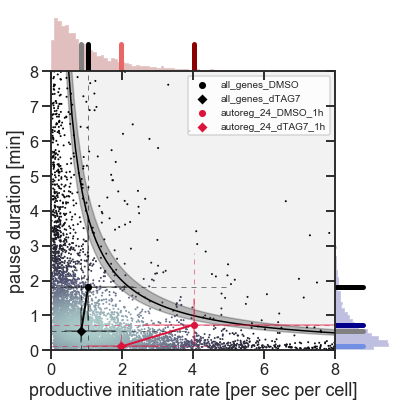

In [10]:
###########################################
##### plot pause-initiation landscape #####
###########################################

all_sets = [SE_464_PI, TF_53_PI, CRC_29_PI, autoreg_PI, CRC_old_PI]
all_set_names = ["SE_464_PI", "TF_53_PI", "CRC_29_PI", "autoreg_PI", "CRC_old_PI"]

### make jointGrid plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(5,5))

# for plotting kernel density colormap
xy = np.vstack([clean_PI_df['initiation.rate.per.cell.dTAG71h'],clean_PI_df['pause.duration.dTAG71h']])
z = sc.stats.gaussian_kde(xy)(xy)



# make jointGrid
g = sns.JointGrid(x='initiation.rate.per.cell.dTAG71h', y='pause.duration.dTAG71h', data=clean_PI_df, space=0, xlim=(0,8), ylim=(0,8))

# cmap Bone
#g = g.plot_joint(plt.scatter, s=4, cmap="bone", c=z, vmin=z.min(), vmax=1.5*z.max(), linewidth=0)
# cmap inferno
g = g.plot_joint(plt.scatter, s=4, cmap="bone", c=z, vmin=z.min(), vmax=1.3*z.max(), linewidth=0)

#_ = g.ax_marg_x.hist(clean_PI_df['initiation.rate.per.cell.DMSO1h'], color="darkred", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled")
#_ = g.ax_marg_y.hist(clean_PI_df['pause.duration.DMSO1h'], color="darkblue", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled", orientation="horizontal")
_ = g.ax_marg_x.hist(clean_PI_df['initiation.rate.per.cell.dTAG71h'], color="darkred", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled")
_ = g.ax_marg_y.hist(clean_PI_df['pause.duration.dTAG71h'], color="darkblue", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled", orientation="horizontal")

_ = g.ax_marg_x.axvline(x=autoreg_PI['initiation.rate.per.cell.DMSO1h'].median(), ymax=0.5, color="darkred", linewidth=5)
_ = g.ax_marg_y.axhline(y=autoreg_PI['pause.duration.DMSO1h'].median(), xmax=0.5, color="darkblue", linewidth=5)
_ = g.ax_marg_x.axvline(x=autoreg_PI['initiation.rate.per.cell.dTAG71h'].median(), ymax=0.5, color="#e86666", linewidth=5)
_ = g.ax_marg_y.axhline(y=autoreg_PI['pause.duration.dTAG71h'].median(), xmax=0.5, color="#7190e3", linewidth=5)

_ = g.ax_marg_x.axvline(x=clean_PI_df['initiation.rate.per.cell.DMSO1h'].median(), ymax=0.5, color="black", linewidth=5)
_ = g.ax_marg_y.axhline(y=clean_PI_df['pause.duration.DMSO1h'].median(), xmax=0.5, color="black", linewidth=5)
_ = g.ax_marg_x.axvline(x=clean_PI_df['initiation.rate.per.cell.dTAG71h'].median(), ymax=0.5, color="#808080", linewidth=5)
_ = g.ax_marg_y.axhline(y=clean_PI_df['pause.duration.dTAG71h'].median(), xmax=0.5, color="#808080", linewidth=5)


#### make central pause-initiation limit
x = np.linspace(200./(10*50), 10, num=100)
y = (200./50)/np.linspace(200./(10*50), 10, num=100)
x = np.append(x, 10)
y = np.append(y, 10)

plt.fill(x,y, edgecolor="#000000", facecolor="#0000000D")

# make confidence intervals
x1 = np.linspace(200./((10*50)*(1 + uncertainty)), 10, num=100)
x2 = np.linspace(200./((10*50)*(1 - uncertainty)), 10, num=100)[::-1]
y1 = (200./(50*(1 + uncertainty)))/np.linspace(200./(10*50*(1 + uncertainty)), 10, num=100)
y2 = (200./(50*(1 - uncertainty)))/np.linspace(200./(10*50*(1 - uncertainty)), 10, num=100)[::-1]

plt.fill(np.append(x1, x2),np.append(y1, y2), alpha=.25, color="#000000")



#### plot X median markers (DMSO and 1h)
plt.scatter(x=clean_PI_df['initiation.rate.per.cell.DMSO1h'].median(), y=clean_PI_df['pause.duration.DMSO1h'].median(), marker="o", s=50, c="black", label="all_genes_DMSO", linewidths=0)
plt.scatter(x=clean_PI_df['initiation.rate.per.cell.dTAG71h'].median(), y=clean_PI_df['pause.duration.dTAG71h'].median(), marker="D", s=50, c="black", label="all_genes_dTAG7", linewidths=0)
plt.plot([clean_PI_df['initiation.rate.per.cell.DMSO1h'].median(), clean_PI_df['initiation.rate.per.cell.dTAG71h'].median()], [clean_PI_df['pause.duration.DMSO1h'].median(), clean_PI_df['pause.duration.dTAG71h'].median()], color="black", linewidth=2)

plt.scatter(x=autoreg_PI['initiation.rate.per.cell.DMSO1h'].median(), y=autoreg_PI['pause.duration.DMSO1h'].median(), marker="o", s=50, c="crimson", label="autoreg_24_DMSO_1h", linewidths=0)
plt.scatter(x=autoreg_PI['initiation.rate.per.cell.dTAG71h'].median(), y=autoreg_PI['pause.duration.dTAG71h'].median(), marker="D", s=50, c="crimson", label="autoreg_24_dTAG7_1h", linewidths=0)
plt.plot([autoreg_PI['initiation.rate.per.cell.DMSO1h'].median(), autoreg_PI['initiation.rate.per.cell.dTAG71h'].median()], [autoreg_PI['pause.duration.DMSO1h'].median(), autoreg_PI['pause.duration.dTAG71h'].median()], color="crimson", linewidth=2)



#### plot dashed lines as whiskers (1.5*(0.75p - 0.25p quartile range))
## autoregulatory TFs
# initiation freq.
IQR_autoreg_init=autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75) - autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25)
low_autoreg_whis_init = max([autoreg_PI['initiation.rate.per.cell.DMSO1h'].min(), autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25) - 1.5*IQR_autoreg_init])
hi_autoreg_whis_init = min([autoreg_PI['initiation.rate.per.cell.DMSO1h'].max(), autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75) + 1.5*IQR_autoreg_init])
plt.plot([low_autoreg_whis_init, hi_autoreg_whis_init], [autoreg_PI['pause.duration.DMSO1h'].median(),autoreg_PI['pause.duration.DMSO1h'].median()], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_autoreg_pause=autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.75) - autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.25)
low_autoreg_whis_pause = max([autoreg_PI['pause.duration.DMSO1h'].min(), autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.25) - 1.5*IQR_autoreg_pause])
hi_autoreg_whis_pause = min([autoreg_PI['pause.duration.DMSO1h'].max(), autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.75) + 1.5*IQR_autoreg_pause])
plt.plot([autoreg_PI['initiation.rate.per.cell.DMSO1h'].median(), autoreg_PI['initiation.rate.per.cell.DMSO1h'].median()], [low_autoreg_whis_pause, hi_autoreg_whis_pause], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
## all_genes
# initiation freq.
IQR_all_init=clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75) - clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25)
low_all_whis_init = max([clean_PI_df['initiation.rate.per.cell.DMSO1h'].min(), clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25) - 1.5*IQR_all_init])
hi_all_whis_init = min([clean_PI_df['initiation.rate.per.cell.DMSO1h'].max(), clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75) + 1.5*IQR_all_init])
plt.plot([low_all_whis_init, hi_all_whis_init], [clean_PI_df['pause.duration.DMSO1h'].median(),clean_PI_df['pause.duration.DMSO1h'].median()], color="black", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_all_pause=clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.75) - clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.25)
low_all_whis_pause = max([clean_PI_df['pause.duration.DMSO1h'].min(), clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.25) - 1.5*IQR_all_pause])
hi_all_whis_pause = min([clean_PI_df['pause.duration.DMSO1h'].max(), clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.75) + 1.5*IQR_all_pause])
plt.plot([clean_PI_df['initiation.rate.per.cell.DMSO1h'].median(), clean_PI_df['initiation.rate.per.cell.DMSO1h'].median()], [low_all_whis_pause, hi_all_whis_pause], color="black", dashes=[5,5], alpha=0.5, linewidth=1)

## plot solid lines as IQR (0.75p - 0.25p quartile range)
# autoregulatory TFs
plt.plot([autoreg_PI['initiation.rate.per.cell.DMSO1h'].median(),autoreg_PI['initiation.rate.per.cell.DMSO1h'].median()], [autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.25), autoreg_PI['pause.duration.DMSO1h'].quantile(q=0.75)], color="crimson", alpha=0.5, linewidth=1.5)
plt.plot([autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25),autoreg_PI['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75)], [autoreg_PI['pause.duration.DMSO1h'].median(), autoreg_PI['pause.duration.DMSO1h'].median()], color="crimson", alpha=0.5, linewidth=1.5)
# all_genes
plt.plot([clean_PI_df['initiation.rate.per.cell.DMSO1h'].median(),clean_PI_df['initiation.rate.per.cell.DMSO1h'].median()], [clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.25), clean_PI_df['pause.duration.DMSO1h'].quantile(q=0.75)], color="black", alpha=0.5, linewidth=1.5)
plt.plot([clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.25),clean_PI_df['initiation.rate.per.cell.DMSO1h'].quantile(q=0.75)], [clean_PI_df['pause.duration.DMSO1h'].median(), clean_PI_df['pause.duration.DMSO1h'].median()], color="black", alpha=0.5, linewidth=1.5)


######## same for the 1h median points
#### plot dashed lines as whiskers (1.5*(0.75p - 0.25p quartile range))
## autoregulatory TFs
# initiation freq.
IQR_autoreg_init=autoreg_PI['initiation.rate.per.cell.dTAG71h'].quantile(q=0.75) - autoreg_PI['initiation.rate.per.cell.dTAG71h'].quantile(q=0.25)
low_autoreg_whis_init = max([autoreg_PI['initiation.rate.per.cell.dTAG71h'].min(), autoreg_PI['initiation.rate.per.cell.dTAG71h'].quantile(q=0.25) - 1.5*IQR_autoreg_init])
hi_autoreg_whis_init = min([autoreg_PI['initiation.rate.per.cell.dTAG71h'].max(), autoreg_PI['initiation.rate.per.cell.dTAG71h'].quantile(q=0.75) + 1.5*IQR_autoreg_init])
plt.plot([low_autoreg_whis_init, hi_autoreg_whis_init], [autoreg_PI['pause.duration.dTAG71h'].median(),autoreg_PI['pause.duration.dTAG71h'].median()], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_autoreg_pause=autoreg_PI['pause.duration.dTAG71h'].quantile(q=0.75) - autoreg_PI['pause.duration.dTAG71h'].quantile(q=0.25)
low_autoreg_whis_pause = max([autoreg_PI['pause.duration.dTAG71h'].min(), autoreg_PI['pause.duration.dTAG71h'].quantile(q=0.25) - 1.5*IQR_autoreg_pause])
hi_autoreg_whis_pause = min([autoreg_PI['pause.duration.dTAG71h'].max(), autoreg_PI['pause.duration.dTAG71h'].quantile(q=0.75) + 1.5*IQR_autoreg_pause])
plt.plot([autoreg_PI['initiation.rate.per.cell.dTAG71h'].median(), autoreg_PI['initiation.rate.per.cell.dTAG71h'].median()], [low_autoreg_whis_pause, hi_autoreg_whis_pause], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
## all_genes
# initiation freq.
IQR_all_init=clean_PI_df['initiation.rate.per.cell.dTAG71h'].quantile(q=0.75) - clean_PI_df['initiation.rate.per.cell.dTAG71h'].quantile(q=0.25)
low_all_whis_init = max([clean_PI_df['initiation.rate.per.cell.dTAG71h'].min(), clean_PI_df['initiation.rate.per.cell.dTAG71h'].quantile(q=0.25) - 1.5*IQR_all_init])
hi_all_whis_init = min([clean_PI_df['initiation.rate.per.cell.dTAG71h'].max(), clean_PI_df['initiation.rate.per.cell.dTAG71h'].quantile(q=0.75) + 1.5*IQR_all_init])
plt.plot([low_all_whis_init, hi_all_whis_init], [clean_PI_df['pause.duration.dTAG71h'].median(),clean_PI_df['pause.duration.dTAG71h'].median()], color="black", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_all_pause=clean_PI_df['pause.duration.dTAG71h'].quantile(q=0.75) - clean_PI_df['pause.duration.dTAG71h'].quantile(q=0.25)
low_all_whis_pause = max([clean_PI_df['pause.duration.dTAG71h'].min(), clean_PI_df['pause.duration.dTAG71h'].quantile(q=0.25) - 1.5*IQR_all_pause])
hi_all_whis_pause = min([clean_PI_df['pause.duration.dTAG71h'].max(), clean_PI_df['pause.duration.dTAG71h'].quantile(q=0.75) + 1.5*IQR_all_pause])
plt.plot([clean_PI_df['initiation.rate.per.cell.dTAG71h'].median(), clean_PI_df['initiation.rate.per.cell.dTAG71h'].median()], [low_all_whis_pause, hi_all_whis_pause], color="black", dashes=[5,5], alpha=0.5, linewidth=1)

## plot solid lines as IQR (0.75p - 0.25p quartile range)
# autoregulatory TFs
plt.plot([autoreg_PI['initiation.rate.per.cell.dTAG71h'].median(),autoreg_PI['initiation.rate.per.cell.dTAG71h'].median()], [autoreg_PI['pause.duration.dTAG71h'].quantile(q=0.25), autoreg_PI['pause.duration.dTAG71h'].quantile(q=0.75)], color="crimson", alpha=0.5, linewidth=1.5)
plt.plot([autoreg_PI['initiation.rate.per.cell.dTAG71h'].quantile(q=0.25),autoreg_PI['initiation.rate.per.cell.dTAG71h'].quantile(q=0.75)], [autoreg_PI['pause.duration.dTAG71h'].median(), autoreg_PI['pause.duration.dTAG71h'].median()], color="crimson", alpha=0.5, linewidth=1.5)
# all_genes
plt.plot([clean_PI_df['initiation.rate.per.cell.dTAG71h'].median(),clean_PI_df['initiation.rate.per.cell.dTAG71h'].median()], [clean_PI_df['pause.duration.dTAG71h'].quantile(q=0.25), clean_PI_df['pause.duration.dTAG71h'].quantile(q=0.75)], color="black", alpha=0.5, linewidth=1.5)
plt.plot([clean_PI_df['initiation.rate.per.cell.dTAG71h'].quantile(q=0.25),clean_PI_df['initiation.rate.per.cell.dTAG71h'].quantile(q=0.75)], [clean_PI_df['pause.duration.dTAG71h'].median(), clean_PI_df['pause.duration.dTAG71h'].median()], color="black", alpha=0.5, linewidth=1.5)



# formatting
plt.legend(loc="upper right", fontsize=10)
plt.xlabel('productive initiation rate [per sec per cell]')
plt.ylabel('pause duration [min]')

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_jointPlot_autoReg_boneR_8x8_combined.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_jointPlot_autoReg_boneR_8x8_combined.png', dpi=300)
plt.show()

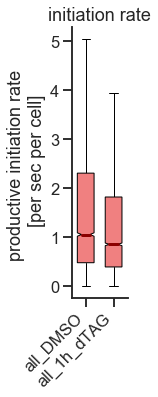

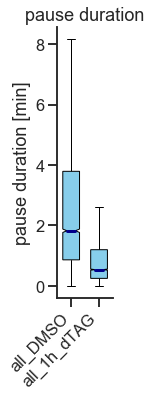

INITIATION 	 all_DMSO vs. all_1h_dTAG 	MannwhitneyuResult(statistic=20628091.0, pvalue=9.815455997581283e-27)
PAUSE DURATION 	 all_DMSO vs. all_1h_dTAG 	MannwhitneyuResult(statistic=11188756.0, pvalue=0.0)


In [6]:
##########################################
##### plot pause-initiation boxplots #####
##########################################

all_sets = [SE_464_PI, TF_53_PI, CRC_29_PI, autoreg_PI, CRC_old_PI]
all_set_names = ["SE_464_PI", "TF_53_PI", "CRC_29_PI", "autoreg_PI", "CRC_old_PI"]

#### initiation rate
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(1,5))

# plotting all individual
#plt.boxplot(x=[clean_PI_df['initiation.rate.per.cell.DMSO1h'], clean_PI_df['initiation.rate.per.cell.dTAG71h'], SE_464_PI['initiation.rate.per.cell.DMSO1h'], SE_464_PI['initiation.rate.per.cell.dTAG71h'], TF_53_PI['initiation.rate.per.cell.DMSO1h'], TF_53_PI['initiation.rate.per.cell.dTAG71h'], CRC_29_PI['initiation.rate.per.cell.DMSO1h'], CRC_29_PI['initiation.rate.per.cell.dTAG71h'], autoreg_PI['initiation.rate.per.cell.DMSO1h'], autoreg_PI['initiation.rate.per.cell.dTAG71h']], sym='', labels=["all_DMSO", "all_1h_dTAG", "464_SE_1h_DMSO", "464_SE_1h_dTAG", "53_TFs_1h_DMSO", "53_TFs_1h_dTAG", "29_CRC_1h_DMSO", "29_CRC_1h_dTAG", "24_autoreg_1h_DMSO", "24_autoreg_1h_dTAG"], medianprops=dict(color="darkred", linewidth=3), patch_artist=True, boxprops=dict(facecolor="lightcoral"))

# plotting only all_genes
plt.boxplot(x=[clean_PI_df['initiation.rate.per.cell.DMSO1h'], clean_PI_df['initiation.rate.per.cell.dTAG71h']], notch=True, labels=["all_DMSO", "all_1h_dTAG"], showfliers=False, medianprops=dict(color="darkred", linewidth=3), widths=0.6, patch_artist=True, boxprops=dict(facecolor="lightcoral"))


# formatting
plt.title("initiation rate")
plt.xticks(rotation=45, ha="right")
plt.ylabel('productive initiation rate \n [per sec per cell]')
sns.despine()

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\initiation-rate_boxplot_all_genes_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\initiation-rate_boxplot_all_genes_1x5.png', dpi=300)
plt.show()



#### pause duration
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(1,5))

# plotting all individual
#plt.boxplot(x=[clean_PI_df['pause.duration.DMSO1h'], clean_PI_df['pause.duration.dTAG71h'], SE_464_PI['pause.duration.DMSO1h'].dropna(), SE_464_PI['pause.duration.dTAG71h'].dropna(), TF_53_PI['pause.duration.DMSO1h'].dropna(), TF_53_PI['pause.duration.dTAG71h'].dropna(), CRC_29_PI['pause.duration.DMSO1h'].dropna(), CRC_29_PI['pause.duration.dTAG71h'].dropna(), autoreg_PI['pause.duration.DMSO1h'], autoreg_PI['pause.duration.dTAG71h']], sym='', labels=["all_DMSO", "all_1h_dTAG", "464_SE_1h_DMSO", "464_SE_1h_dTAG", "53_TFs_1h_DMSO", "53_TFs_1h_dTAG", "29_CRC_1h_DMSO", "29_CRC_1h_dTAG", "24_autoreg_1h_DMSO", "24_autoreg_1h_dTAG"], manage_xticks=True, patch_artist=True, medianprops=dict(color="darkblue", linewidth=3), boxprops=dict(facecolor="skyblue"))

# plotting only all_genes
plt.boxplot(x=[clean_PI_df['pause.duration.DMSO1h'], clean_PI_df['pause.duration.dTAG71h']], notch=True, labels=["all_DMSO", "all_1h_dTAG"], widths=0.6, showfliers=False, manage_xticks=True, patch_artist=True, medianprops=dict(color="darkblue", linewidth=3), boxprops=dict(facecolor="skyblue"))


# formatting
plt.title("pause duration")
plt.xticks(rotation=45, ha="right")
plt.ylabel('pause duration [min]')
sns.despine()

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\pause-duration_boxplot_all_genes_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\pause-duration_boxplot_all_genes_1x5.png', dpi=300)
plt.show()

print "INITIATION \t all_DMSO vs. all_1h_dTAG \t", sc.stats.mannwhitneyu(clean_PI_df['initiation.rate.per.cell.DMSO1h'], clean_PI_df['initiation.rate.per.cell.dTAG71h'])
print "PAUSE DURATION \t all_DMSO vs. all_1h_dTAG \t", sc.stats.mannwhitneyu(clean_PI_df['pause.duration.DMSO1h'], clean_PI_df['pause.duration.dTAG71h'])

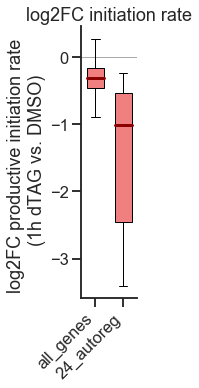

C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log2


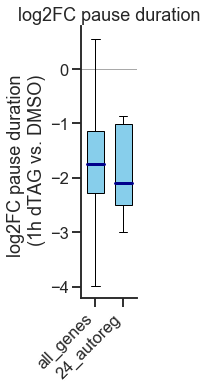

In [7]:
#######################
##### with log2FC #####
#######################

#### log2FC initiation rate
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(1,5))

# plotting all individual
plt.axhline(y=0, color="darkgray", linewidth=1)
#plt.boxplot(x=[np.log2(clean_PI_df['initiation.rate.per.cell.dTAG71h']/clean_PI_df['initiation.rate.per.cell.DMSO1h']), np.log2(SE_464_PI['initiation.rate.per.cell.dTAG71h']/SE_464_PI['initiation.rate.per.cell.DMSO1h']), np.log2(TF_53_PI['initiation.rate.per.cell.dTAG71h']/TF_53_PI['initiation.rate.per.cell.DMSO1h']), np.log2(CRC_29_PI['initiation.rate.per.cell.dTAG71h']/CRC_29_PI['initiation.rate.per.cell.DMSO1h']), np.log2(autoreg_PI['initiation.rate.per.cell.dTAG71h']/autoreg_PI['initiation.rate.per.cell.DMSO1h'])], sym='', labels=["all_genes", "464_SE", "53_TFs", "29_CRC", "24_autoreg"], medianprops=dict(color="darkred", linewidth=3), patch_artist=True, boxprops=dict(facecolor="lightcoral"))
plt.boxplot(x=[np.log2(clean_PI_df['initiation.rate.per.cell.dTAG71h']/clean_PI_df['initiation.rate.per.cell.DMSO1h']), np.log2(autoreg_PI['initiation.rate.per.cell.dTAG71h']/autoreg_PI['initiation.rate.per.cell.DMSO1h'])], widths=0.6, showfliers=False, labels=["all_genes", "24_autoreg"], medianprops=dict(color="darkred", linewidth=3), patch_artist=True, boxprops=dict(facecolor="lightcoral"))

# formatting
plt.title("log2FC initiation rate")
plt.xticks(rotation=45, ha="right")
plt.ylabel('log2FC productive initiation rate \n (1h dTAG vs. DMSO)')
sns.despine()

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\initiation-freq_1h_vs_DMSO_log2FC_all+autoreg_boxplot_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\initiation-freq_1h_vs_DMSO_log2FC_all+autoreg_boxplot_1x5.png', dpi=300)
plt.show()




#### log2FC pause duration
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(1,5))

# plotting all individual
plt.axhline(y=0, color="darkgray", linewidth=1)
#plt.boxplot(x=[np.log2(clean_PI_df['pause.duration.dTAG71h']/clean_PI_df['pause.duration.DMSO1h']), np.log2(SE_464_PI['pause.duration.dTAG71h'].dropna()/SE_464_PI['pause.duration.DMSO1h'].dropna()), np.log2(TF_53_PI['pause.duration.dTAG71h'].dropna()/TF_53_PI['pause.duration.DMSO1h'].dropna()), np.log2(CRC_29_PI['pause.duration.dTAG71h'].dropna()/CRC_29_PI['pause.duration.DMSO1h'].dropna()), np.log2(autoreg_PI['pause.duration.dTAG71h']/autoreg_PI['pause.duration.DMSO1h'])], sym='', labels=["all_genes", "464_SE", "53_TFs", "29_CRC", "24_autoreg"], medianprops=dict(color="darkblue", linewidth=3), patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.boxplot(x=[np.log2(clean_PI_df['pause.duration.dTAG71h']/clean_PI_df['pause.duration.DMSO1h']), np.log2(autoreg_PI['pause.duration.dTAG71h']/autoreg_PI['pause.duration.DMSO1h'])], widths=0.6, showfliers=False, labels=["all_genes", "24_autoreg"], medianprops=dict(color="darkblue", linewidth=3), patch_artist=True, boxprops=dict(facecolor="skyblue"))


# formatting
plt.title("log2FC pause duration")
plt.xticks(rotation=45, ha="right")
plt.ylabel('log2FC pause duration \n (1h dTAG vs. DMSO)')
sns.despine()

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\pause-duration_1h_vs_DMSO_log2FC_all+autoreg_boxplot_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\pause-duration_1h_vs_DMSO_log2FC_all+autoreg_boxplot_1x5.png', dpi=300)
plt.show()

In [10]:
plt.boxplot?

In [640]:
### Mann-Whitney-U test initiation rate
y1=np.array(np.log2(clean_PI_df['initiation.rate.per.cell.dTAG71h']/clean_PI_df['initiation.rate.per.cell.DMSO1h']))
y2=np.array(np.log2(SE_464_PI['initiation.rate.per.cell.dTAG71h']/SE_464_PI['initiation.rate.per.cell.DMSO1h']))
y3=np.array(np.log2(TF_53_PI['initiation.rate.per.cell.dTAG71h']/TF_53_PI['initiation.rate.per.cell.DMSO1h']))
y4=np.array(np.log2(CRC_29_PI['initiation.rate.per.cell.dTAG71h']/CRC_29_PI['initiation.rate.per.cell.DMSO1h']))
y5=np.array(np.log2(autoreg_PI['initiation.rate.per.cell.dTAG71h']/autoreg_PI['initiation.rate.per.cell.DMSO1h']))

print "\nINITIATION RATE"
#print "all vs. SE: \t\t", sc.stats.mannwhitneyu(y1, y2)
#print "all vs. TF: \t\t", sc.stats.mannwhitneyu(y1, y3)
#print "all vs. CRC: \t\t", sc.stats.mannwhitneyu(y1, y4)
print "all vs. autoreg: \t", sc.stats.mannwhitneyu(y1, y5)

### Mann-Whitney-U test pause duration
x1=np.array(np.log2(clean_PI_df['pause.duration.dTAG71h']/clean_PI_df['pause.duration.DMSO1h']))
x2=np.array(np.log2(SE_464_PI['pause.duration.dTAG71h'].dropna()/SE_464_PI['pause.duration.DMSO1h'].dropna()))
x3=np.array(np.log2(TF_53_PI['pause.duration.dTAG71h'].dropna()/TF_53_PI['pause.duration.DMSO1h'].dropna()))
x4=np.array(np.log2(CRC_29_PI['pause.duration.dTAG71h'].dropna()/CRC_29_PI['pause.duration.DMSO1h'].dropna()))
x5=np.array(np.log2(autoreg_PI['pause.duration.dTAG71h'].dropna()/autoreg_PI['pause.duration.DMSO1h'].dropna()))

print "\nPAUSE DURATION"
#print "all vs. SE: \t\t", sc.stats.mannwhitneyu(x1, x2)
#print "all vs. TF: \t\t", sc.stats.mannwhitneyu(x1, x3)
#print "all vs. CRC: \t\t", sc.stats.mannwhitneyu(x1, x4)
print "all vs. autoreg: \t", sc.stats.mannwhitneyu(x1, x5)
print "\n"


INITIATION RATE
all vs. autoreg: 	MannwhitneyuResult(statistic=8483.5, pvalue=0.001614130923679911)

PAUSE DURATION
all vs. autoreg: 	MannwhitneyuResult(statistic=22711.5, pvalue=0.41934331466899516)




C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app


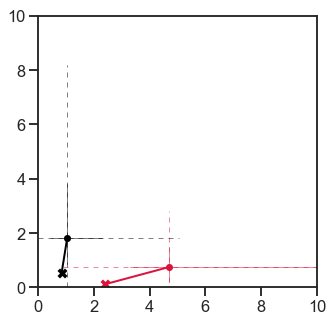

In [606]:
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(5,5))


plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [10]:
SE_464_PI.describe()

,start,end,length,initiation.rate.per.cell.DMSO1h,initiation.rate.per.cell.dTAG71h,initiation.rate.per.cell.DMSO2h,initiation.rate.per.cell.dTAG72h,pause.duration.DMSO1h,pause.duration.dTAG71h,pause.duration.DMSO2h,pause.duration.dTAG72h
count,2.440000e+02,2.440000e+02,2.440000e+02,244.000000,244.000000,244.000000,244.000000,226.000000,226.000000,226.000000,226.000000
mean,7.099154e+07,7.106732e+07,7.577695e+04,3.183764,2.121809,3.120541,1.590196,2.640257,0.896892,1.371015,0.432556
std,5.543158e+07,5.543985e+07,1.148640e+05,5.140839,3.564958,5.000127,2.666987,4.063441,1.849195,2.937840,1.553318
min,3.196730e+05,3.209140e+05,3.740000e+02,0.058989,0.034313,0.073318,0.027467,0.089958,0.008174,0.042571,0.002097
25%,2.847948e+07,2.850130e+07,1.719575e+04,0.636895,0.448208,0.637075,0.377817,0.760649,0.153722,0.324182,0.054404
50%,6.216960e+07,6.234146e+07,4.057350e+04,1.529045,1.104424,1.424111,0.819121,1.591722,0.386707,0.750550,0.125365
75%,1.096585e+08,1.096827e+08,8.999575e+04,3.219438,2.194920,2.911547,1.592182,2.961017,0.841922,1.508265,0.318247
max,2.378595e+08,2.379121e+08,1.181195e+06,42.740767,33.864155,32.567507,25.256873,40.209337,16.247528,33.348978,19.351013


In [11]:
TF_53_PI.describe()

,start,end,length,initiation.rate.per.cell.DMSO1h,initiation.rate.per.cell.dTAG71h,initiation.rate.per.cell.DMSO2h,initiation.rate.per.cell.dTAG72h,pause.duration.DMSO1h,pause.duration.dTAG71h,pause.duration.DMSO2h,pause.duration.dTAG72h
count,1.900000e+01,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000,18.000000,18.000000,18.000000
mean,7.934651e+07,7.941309e+07,66576.947368,4.789994,1.865492,7.099406,1.387351,1.768199,1.139521,0.916313,1.099151
std,5.448818e+07,5.446307e+07,86382.462001,5.296989,1.504494,8.910756,1.542438,1.852930,2.163432,1.244864,2.540227
min,4.979412e+06,4.985180e+06,2471.000000,0.309749,0.102486,0.239818,0.027467,0.180406,0.014790,0.051037,0.012303
25%,3.807471e+07,3.808957e+07,5891.000000,1.394302,0.651151,1.717460,0.502525,0.422307,0.098807,0.166989,0.044505
50%,6.808537e+07,6.822926e+07,23719.000000,3.084686,1.346225,2.714971,1.042004,1.375709,0.266076,0.447818,0.088156
75%,1.270868e+08,1.271087e+08,119174.500000,5.206781,2.639912,8.537016,1.516096,2.521662,0.670127,0.888116,0.253992
max,1.941361e+08,1.941386e+08,290327.000000,19.353824,4.634696,31.485601,6.525722,7.433140,6.982347,4.717415,9.201217


In [12]:
CRC_29_PI.describe()

,start,end,length,initiation.rate.per.cell.DMSO1h,initiation.rate.per.cell.dTAG71h,initiation.rate.per.cell.DMSO2h,initiation.rate.per.cell.dTAG72h,pause.duration.DMSO1h,pause.duration.dTAG71h,pause.duration.DMSO2h,pause.duration.dTAG72h
count,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,9.000000,9.000000
mean,7.904453e+07,7.910801e+07,63471.900000,5.793716,2.023720,9.121577,1.539939,1.107807,0.953016,0.451796,0.761542
std,5.342157e+07,5.338791e+07,78326.434783,6.151501,1.435241,11.003146,1.836556,0.937025,2.265744,0.360294,2.050193
min,4.979412e+06,4.985180e+06,5366.000000,0.309749,0.242976,0.239818,0.144779,0.180406,0.044723,0.051037,0.014337
25%,4.890791e+07,4.892971e+07,15928.750000,2.300108,1.298990,1.871037,0.682614,0.223799,0.095122,0.101953,0.040729
50%,6.426827e+07,6.439138e+07,30789.000000,3.292231,1.705443,3.507164,1.101181,0.759098,0.122588,0.390508,0.073600
75%,1.274115e+08,1.274251e+08,86328.750000,7.010192,2.675547,11.885906,1.496492,1.631286,0.370962,0.740855,0.130574
max,1.550026e+08,1.550185e+08,245538.000000,19.353824,4.559186,31.485601,6.525722,2.795183,6.982347,0.976857,6.226365


In [25]:
autoreg_PI

,chr,strand,start,end,type,source,length,id,initiation.rate.per.cell.DMSO1h,initiation.rate.per.cell.dTAG71h,...,pause.duration.DMSO1h,pause.duration.dTAG71h,pause.duration.DMSO2h,pause.duration.dTAG72h,induced,repressed,repressed 3-fold,repressed 5-fold,gene_id,transcript_id
TR03426,chr2,-,60451167,60553498,transcribed_region,REFSEQ_merge,102332,TR03426,3.178971,1.578099,...,0.190366,0.044723,0.101845,0.022051,False,False,False,False,ENSG00000119866,NM_022893 NM_018014 NM_138559
TR04019,chr3,+,4979412,4985180,transcribed_region,REFSEQ_merge,5769,TR04019,0.908456,0.242976,...,2.172598,0.458719,0.933544,0.130574,False,False,False,False,ENSG00000134107,NM_003670
TR07987,chr6,+,135181315,135219173,transcribed_region,REFSEQ_merge,37859,TR07987,19.353824,2.394130,...,0.223799,0.122588,0.101953,0.040729,False,False,False,False,ENSG00000118513 NA,NM_001161657 NM_001130173 NM_001161658 NM_0011...
TR10279,chr8,+,127736069,127741434,transcribed_region,REFSEQ_merge,5366,TR10279,13.618600,1.283245,...,2.795183,6.982347,0.390508,6.226365,False,False,False,False,ENSG00000136997,NM_002467
TR13837,chr11,-,47354858,47378576,transcribed_region,REFSEQ_merge,23719,TR13837,3.405491,2.769353,...,0.739864,0.109863,0.505128,0.014337,False,False,False,False,ENSG00000066336,NM_003120 NM_001080547
TR14410,chr12,+,11649854,11895391,transcribed_region,REFSEQ_merge,245538,TR14410,4.680155,3.984717,...,0.759098,0.095122,0.264433,0.073600,False,False,False,False,ENSG00000139083,NM_001987
TR22763,chr20,-,53567071,53583097,transcribed_region,REFSEQ_merge,16027,TR22763,7.786871,4.559186,...,0.180406,0.081506,0.051037,0.043455,False,False,False,False,ENSG00000171940,NM_006526


In [14]:
CRC_old_PI.describe()

,start,end,length,initiation.rate.per.cell.DMSO1h,initiation.rate.per.cell.dTAG71h,initiation.rate.per.cell.DMSO2h,initiation.rate.per.cell.dTAG72h,pause.duration.DMSO1h,pause.duration.dTAG71h,pause.duration.DMSO2h,pause.duration.dTAG72h
count,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,8.078399e+07,8.084249e+07,58508.375000,6.088049,1.787339,9.682160,1.033250,1.545040,1.209373,0.695950,0.883864
std,5.603221e+07,5.599209e+07,81927.861345,6.705384,1.208359,11.945382,0.542972,1.315575,2.384517,0.796553,2.163620
min,4.979412e+06,4.985180e+06,5366.000000,0.908456,0.242976,1.358842,0.234814,0.190366,0.044723,0.101845,0.014337
25%,3.842861e+07,3.850778e+07,8316.000000,2.016072,1.137426,2.014274,0.670527,0.610848,0.106178,0.223813,0.036060
50%,9.344438e+07,9.351471e+07,30789.000000,3.292231,1.462162,3.507164,1.001706,1.195192,0.216951,0.447818,0.085823
75%,1.289225e+08,1.289288e+08,54322.250000,6.914766,2.487936,12.582972,1.335263,2.328244,0.731617,0.789027,0.214234
max,1.351813e+08,1.352192e+08,245538.000000,19.353824,3.984717,31.485601,1.908862,3.848127,6.982347,2.529335,6.226365


In [177]:
np.log2(clean_PI_df['initiation.rate.per.cell.dTAG71h']/clean_PI_df['initiation.rate.per.cell.DMSO1h'])

TR00007   -0.245379
TR00009   -0.076959
TR00016   -0.550194
TR00018    0.153442
TR00019   -0.359359
TR00021   -0.089501
TR00033    0.045695
TR00034   -0.239275
TR00042   -0.623663
TR00046   -0.292055
TR00059   -0.339400
TR00062   -0.732196
TR00063   -0.418415
TR00065   -0.234311
TR00069   -0.554809
TR00074   -0.333987
TR00075   -0.006181
TR00076   -0.240386
TR00079   -0.206735
TR00083   -0.148089
TR00084   -0.446465
TR00088   -0.086299
TR00097   -2.392023
TR00098   -0.139110
TR00099   -0.239265
TR00101   -0.157026
TR00125   -0.126200
TR00129   -0.395810
TR00131    0.041788
TR00132    0.108332
             ...   
TR24528   -0.544722
TR24543   -0.198092
TR24544   -0.860875
TR24554   -0.131655
TR24556    0.021766
TR24559   -0.588075
TR24581   -0.442150
TR24597   -0.316905
TR24612   -0.306113
TR24644   -0.411564
TR24648   -0.324107
TR24650    0.193275
TR24651   -0.111812
TR24662    0.958234
TR24664    0.030383
TR24667   -0.222399
TR24670   -0.136404
TR24671   -0.415893
TR24672   -0.344153


In [176]:
clean_PI_df

,chr,strand,start,end,type,source,length,id,initiation.rate.per.cell.DMSO1h,initiation.rate.per.cell.dTAG71h,...,pause.duration.DMSO1h,pause.duration.dTAG71h,pause.duration.DMSO2h,pause.duration.dTAG72h,induced,repressed,repressed 3-fold,repressed 5-fold,gene_id,transcript_id
TR00007,chr1,+,960587,965719,transcribed_region,REFSEQ_merge,5133,TR00007,0.264341,0.222997,...,3.543442,1.166581,2.126284,0.212555,False,False,False,False,ENSG00000187961,NM_198317
TR00009,chr1,+,1013467,1014539,transcribed_region,REFSEQ_merge,1073,TR00009,1.133918,1.075015,...,1.299753,0.459782,0.888566,0.140265,False,False,False,False,ENSG00000187608,NM_005101
TR00016,chr1,+,1232249,1235040,transcribed_region,REFSEQ_merge,2792,TR00016,0.486889,0.332510,...,7.264394,0.950012,2.463715,0.210665,False,False,False,False,ENSG00000176022,NM_080605
TR00018,chr1,+,1308614,1311677,transcribed_region,REFSEQ_merge,3064,TR00018,0.140537,0.156308,...,5.964935,0.804618,3.774202,0.184209,False,False,False,False,ENSG00000169972,NM_153339
TR00019,chr1,+,1324763,1328896,transcribed_region,REFSEQ_merge,4134,TR00019,0.072092,0.056196,...,8.030742,2.445706,3.203371,0.277287,False,False,False,False,ENSG00000224051,NM_001029885
TR00021,chr1,+,1399530,1402046,transcribed_region,REFSEQ_merge,2517,TR00021,1.018212,0.956964,...,2.743201,0.694799,0.934610,0.174622,False,False,False,False,ENSG00000224870,NR_015434
TR00033,chr1,+,2228695,2310213,transcribed_region,REFSEQ_merge,81519,TR00033,0.722944,0.746208,...,0.465972,0.209172,0.351761,0.221022,False,False,False,False,ENSG00000157933,NM_003036
TR00034,chr1,+,2391775,2405446,transcribed_region,REFSEQ_merge,13672,TR00034,0.772299,0.654270,...,2.542123,0.658895,1.103291,0.211624,False,False,False,False,ENSG00000157916,NM_007033
TR00042,chr1,+,3624992,3630130,transcribed_region,REFSEQ_merge,5139,TR00042,0.207026,0.134364,...,3.476799,1.517829,1.033538,0.368888,False,False,False,False,ENSG00000158109,NM_182752
TR00046,chr1,+,3857267,3885429,transcribed_region,REFSEQ_merge,28163,TR00046,0.325840,0.266126,...,3.568976,1.270778,1.670225,0.170384,False,False,False,False,NA ENSG00000169598,NR_104222 NM_001282669 NM_004402 NR_135150 NR_...


In [7]:
PI_df[PI_df.gene_id.str.contains('ENSG00000118513', na=False)]

,chr,strand,start,end,type,source,length,id,initiation.rate.per.cell.DMSO1h,initiation.rate.per.cell.dTAG71h,...,pause.duration.DMSO1h,pause.duration.dTAG71h,pause.duration.DMSO2h,pause.duration.dTAG72h,induced,repressed,repressed 3-fold,repressed 5-fold,gene_id,transcript_id
TR07987,chr6,+,135181315,135219173,transcribed_region,REFSEQ_merge,37859,TR07987,19.353824,2.39413,...,0.223799,0.122588,0.101953,0.040729,False,False,False,False,ENSG00000118513 NA,NM_001161657 NM_001130173 NM_001161658 NM_0011...


In [8]:
clean_PI_df

,chr,strand,start,end,type,source,length,id,initiation.rate.per.cell.DMSO1h,initiation.rate.per.cell.dTAG71h,...,pause.duration.DMSO1h,pause.duration.dTAG71h,pause.duration.DMSO2h,pause.duration.dTAG72h,induced,repressed,repressed 3-fold,repressed 5-fold,gene_id,transcript_id
TR00007,chr1,+,960587,965719,transcribed_region,REFSEQ_merge,5133,TR00007,0.264341,0.222997,...,3.543442,1.166581,2.126284,0.212555,False,False,False,False,ENSG00000187961,NM_198317
TR00009,chr1,+,1013467,1014539,transcribed_region,REFSEQ_merge,1073,TR00009,1.133918,1.075015,...,1.299753,0.459782,0.888566,0.140265,False,False,False,False,ENSG00000187608,NM_005101
TR00016,chr1,+,1232249,1235040,transcribed_region,REFSEQ_merge,2792,TR00016,0.486889,0.332510,...,7.264394,0.950012,2.463715,0.210665,False,False,False,False,ENSG00000176022,NM_080605
TR00018,chr1,+,1308614,1311677,transcribed_region,REFSEQ_merge,3064,TR00018,0.140537,0.156308,...,5.964935,0.804618,3.774202,0.184209,False,False,False,False,ENSG00000169972,NM_153339
TR00019,chr1,+,1324763,1328896,transcribed_region,REFSEQ_merge,4134,TR00019,0.072092,0.056196,...,8.030742,2.445706,3.203371,0.277287,False,False,False,False,ENSG00000224051,NM_001029885
TR00021,chr1,+,1399530,1402046,transcribed_region,REFSEQ_merge,2517,TR00021,1.018212,0.956964,...,2.743201,0.694799,0.934610,0.174622,False,False,False,False,ENSG00000224870,NR_015434
TR00033,chr1,+,2228695,2310213,transcribed_region,REFSEQ_merge,81519,TR00033,0.722944,0.746208,...,0.465972,0.209172,0.351761,0.221022,False,False,False,False,ENSG00000157933,NM_003036
TR00034,chr1,+,2391775,2405446,transcribed_region,REFSEQ_merge,13672,TR00034,0.772299,0.654270,...,2.542123,0.658895,1.103291,0.211624,False,False,False,False,ENSG00000157916,NM_007033
TR00042,chr1,+,3624992,3630130,transcribed_region,REFSEQ_merge,5139,TR00042,0.207026,0.134364,...,3.476799,1.517829,1.033538,0.368888,False,False,False,False,ENSG00000158109,NM_182752
TR00046,chr1,+,3857267,3885429,transcribed_region,REFSEQ_merge,28163,TR00046,0.325840,0.266126,...,3.568976,1.270778,1.670225,0.170384,False,False,False,False,NA ENSG00000169598,NR_104222 NM_001282669 NM_004402 NR_135150 NR_...


In [12]:
mpl.__version__

'2.2.3'